<a href="https://colab.research.google.com/github/rola1174/Elevvo_Tasks/blob/main/StudentPerformanceFactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/lainguyn123/student-performance-factors"
od.download(dataset_url)


Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors


100%|██████████| 93.9k/93.9k [00:00<00:00, 24.9MB/s]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("student-performance-factors/StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

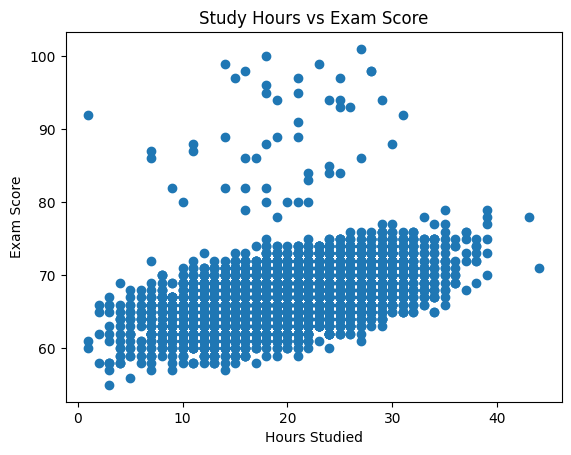

In [5]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [6]:
features = ["Hours_Studied", "Sleep_Hours"]
target = "Exam_Score"

X = df[features]
y = df[target]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)


In [10]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("Linear R2:", r2_score(y_test, y_pred_lr))
print("Polynomial R2:", r2_score(y_test, y_pred_poly))

print("Linear RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Linear R2: 0.20485195984738314
Polynomial R2: 0.20444775987622954
Linear RMSE: 3.515119316423153
Polynomial RMSE: 3.5160126284475512


In [11]:
features2 = ["Hours_Studied"]

X2 = df[features2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

y_pred2 = lr2.predict(X_test2)

print("R2 without Sleep:", r2_score(y_test2, y_pred2))

R2 without Sleep: 0.2051306083246669


In [12]:
results = pd.DataFrame({
    "Model": ["Linear", "Polynomial"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_poly)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly))
    ]
})

results

,Model,R2 Score,RMSE
0,Linear,0.204852,3.515119
1,Polynomial,0.204448,3.516013


/tmp/ipython-input-3443657259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results, palette='viridis')


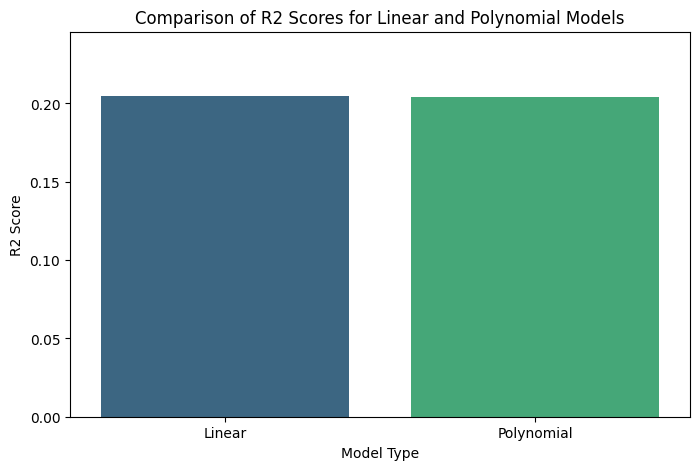

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for R2 Scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2 Score', data=results, palette='viridis')
plt.title('Comparison of R2 Scores for Linear and Polynomial Models')
plt.xlabel('Model Type')
plt.ylabel('R2 Score')
plt.ylim(0, results['R2 Score'].max() * 1.2) # Set y-axis limit for better visualization
plt.show()

/tmp/ipython-input-1217062360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results, palette='magma')


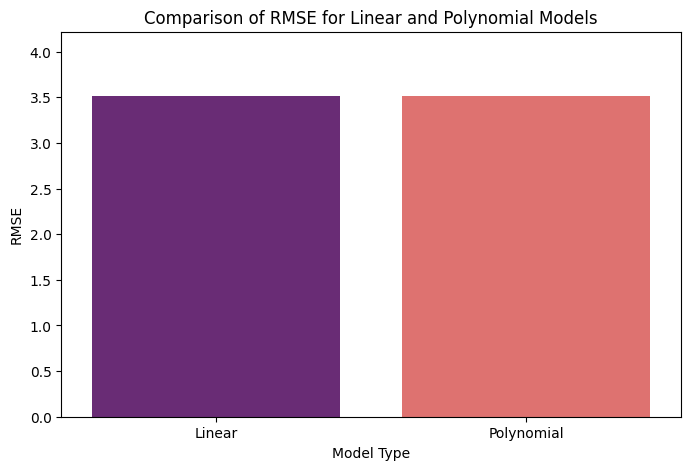

In [14]:
# Create a bar plot for RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=results, palette='magma')
plt.title('Comparison of RMSE for Linear and Polynomial Models')
plt.xlabel('Model Type')
plt.ylabel('RMSE')
plt.ylim(0, results['RMSE'].max() * 1.2) # Set y-axis limit for better visualization
plt.show()

In [15]:
%%writefile README.md
# Forest Cover Type Classification

## Project Overview
This project predicts **forest cover types** using machine learning classification models based on cartographic environmental features.

## Dataset
The dataset contains geographic and environmental variables such as:
- Elevation
- Aspect
- Slope
- Distance to hydrology
- Distance to roadways
- Hillshade measurements
- Wilderness area indicators
- Soil type indicators

**Target:** Cover_Type (forest class)

## Workflow
1. Data preprocessing
2. Exploratory Data Analysis (EDA)
3. Model training
4. Model evaluation using accuracy, confusion matrix, and classification report
5. Model comparison

## Models Used
- Logistic Regression
- Random Forest
- XGBoost

## Evaluation Metrics
- Accuracy
- Confusion Matrix
- Precision / Recall / F1-score

## Author
Rola Mohammed
Machine Learning Engineer | Fresh Graduate


Writing README.md


In [16]:
from google.colab import files
files.download("README.md")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>